In [1]:
############################################################
# -------------------------------------------------------- #
#     El Atractor de Lorenz, ejemplo de Caos dinámico      #
#                         Caso 1
# -------------------------------------------------------- #
#
# ___________________________Jessica Isamar Uriarte Garcia #
# ________________________________________26 de Abril 2018 #
############################################################


%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, glob, os
import IPython.display as IPdisplay, matplotlib.font_manager as fm
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D
from PIL import Image

In [2]:
save_folder = 'images/lorenz-animate'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

In [3]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10
rho   = 28
beta  = 8/3

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

In [4]:
# define the lorenz system
def lorenz_system(current_state, t):
    x, y, z = current_state
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    return [dx_dt, dy_dt, dz_dt]

In [5]:
# plot the system in 3 dimensions
def plot_lorenz(xyz, n):
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    ax.xaxis.set_pane_color((1,1,1,1))
    ax.yaxis.set_pane_color((1,1,1,1))
    ax.zaxis.set_pane_color((1,1,1,1))
    x = xyz[:, 0]
    y = xyz[:, 1]
    z = xyz[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)
    ax.set_xlim((-30,30))
    ax.set_ylim((-30,30))
    ax.set_zlim((0,50))
    ax.set_title('Lorenz system attractor')
    
    plt.savefig('{}/{:03d}.png', dpi=60, bbox_inches='tight', pad_inches=0.1)
    plt.close()

In [6]:
# return a list in iteratively larger chunks
def get_chunks(full_list, size):
    size = max(1, size)
    chunks = [full_list[0:i] for i in range(1, len(full_list) + 1, size)]
    return chunks

In [7]:
# get incrementally larger chunks of the time points, to reveal the attractor one frame at a time
chunks = get_chunks(time_points, size=20)

In [8]:
# get the points to plot, one chunk of time steps at a time, by integrating the system of equations
points = [odeint(lorenz_system, initial_state, chunk) for chunk in chunks]

FileNotFoundError: [Errno 2] No such file or directory: '{}/{:03d}.png'

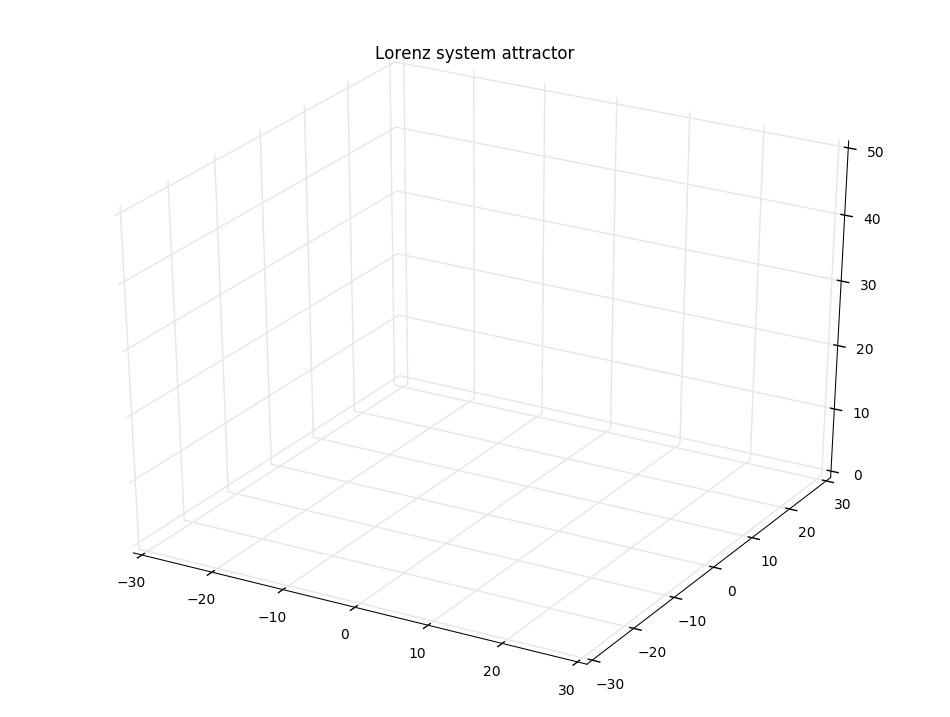

In [9]:
# plot each set of points, one at a time, saving each plot
for n, point in enumerate(points):
    plot_lorenz(point, n)

In [ ]:
# ANIMATION
# create a tuple of display durations, one for each frame
first_last = 100 #show the first and last frames for 100 ms
standard_duration = 5 #show all other frames for 5 ms
durations = tuple([first_last] + [standard_duration] * (len(points) - 2) + [first_last])

In [ ]:
# load all the static images into a list
images = [Image.open(image) for image in glob.glob('{}/*.png')]
gif_filepath = 'LorenzGIF1.gif'

In [ ]:
# save as an animated gif
gif = images[0]
gif.info['duration'] = durations #ms per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])

In [ ]:
# verify that the number of frames in the gif equals the number of image files and durations
Image.open(gif_filepath).n_frames == len(images) == len(durations)

In [ ]:
IPdisplay.Image(url=gif_filepath)